In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
df = pd.read_csv('train (1).csv')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Descriptive Statistics 

In [ ]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
df.shape

(10999, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


Kita dapat melihat bahwa:
* Dataframe memiliki total 10999 baris dan 12 kolom
* Dataframe masih memiliki tidak memiliki *null* values
* Target klasifikasi sepertinya adalah kolom `Reached.on.Time_Y.N` dengan tipe data `int64` dengan nilai 0 = product datang on time & 1 = produk tidak on time
* Berarti sisanya adalah *feature*

Dari informasi di atas, kita bisa pisahkan kolom kategorical dan numerical sebagai berikut:

In [ ]:
cats = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender']
nums = ['Customer_care_calls','Customer_rating','Cost_of_the_Product','Prior_purchases','Weight_in_gms','Discount_offered','Reached.on.Time_Y.N']

### Statistical summary dengan `df.describe()`
Selanjutnya kita munculkan ringkasan statistik dataframe, baik untuk numerical dan categorical. Hal ini dilakukan untuk mengecek secara singkat akan keberadaan outlier dan karakteristik distribusi untuk `feature` numeric.

In [ ]:
df[nums].describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Weight_in_gms,Discount_offered,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,3634.016729,13.373216,0.596691
std,1.141490,1.413603,48.063272,1.522860,1635.377251,16.205527,0.490584
min,2.000000,1.000000,96.000000,2.000000,1001.000000,1.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,1839.500000,4.000000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,4149.000000,7.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,5050.000000,10.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,7846.000000,65.000000,1.000000


Beberapa pengamatan dari *statistical summary* kolom numerik di atas:
* Pada kolom/fitur `Customer_care_call` , `Customer_rating`, dan `Cost_of_the_Product` nilai terlihat terdistribusi normal karena nilai mean dan median cukup dekat dan nilai Q2 ada di tengah antara Q1-Q3
* Kolom/fitur `Prior_purchase` , `Discount_offered`, dan `Weight_in_gms` terlihat tidak terdistribusi normal karena nilai mean dan median tidak terlalu dekat dan nilai Q2 tidak berada di tengah antara Q1-Q3

In [ ]:
df[cats].describe()

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
count,10999,10999,10999,10999
unique,5,3,3,2
top,F,Ship,low,F
freq,3666,7462,5297,5545


Beberapa pengamatan dari *statistical summary* kolom kategorikal di atas:
* Mayoritas data adalah Female (Top kolom `gender` adalah `F` dengan frekuensi 5545 dari 10999 jumlah data), mayoritas dari data menggunakan shipment dengan `ship` dengan frekuensi 7462, lalu mayoritas data adalah low ( Top kolom 'product importance' adalah `low` dengan frekuensinya sebanyak 5297 dari 10999 jumlah data), dan mayoritas data adalah warehouse block `F` dengan frekuensi 3666 dari 10999 sample.
* Sebaran nilai di kolom `Gender` terlihat merata, sedangkan `Warehouse_block` , `Mode_of_Shipment`,dan`Product_importance' terlihat didominasi nilai tertentu.

### Value Counting
untuk memastikan pengamatan mengenai kolom-kolom *categorical* di atas dengan value counting

In [ ]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom Warehouse_block:
F    3666
D    1834
B    1833
C    1833
A    1833
Name: Warehouse_block, dtype: int64

Value count kolom Mode_of_Shipment:
Ship      7462
Flight    1777
Road      1760
Name: Mode_of_Shipment, dtype: int64

Value count kolom Product_importance:
low       5297
medium    4754
high       948
Name: Product_importance, dtype: int64

Value count kolom Gender:
F    5545
M    5454
Name: Gender, dtype: int64



Data ini mendukung penjelasan sebelumnya bahwa pada warehouse_block, data didominasi pada warehouse F. Kemudian pada mode_of_shipment didominasi oleh Ship. Product_importance didominasi kategori low dan medium. Sedangkan, gender tersebar merata.

## Univariate Analysis
Setelah melakukan analisis sederhana tentang statistik deskriptif di atas, sekarang kita fokus pada satu-persatu kolom dengan *Univariate Analysis*

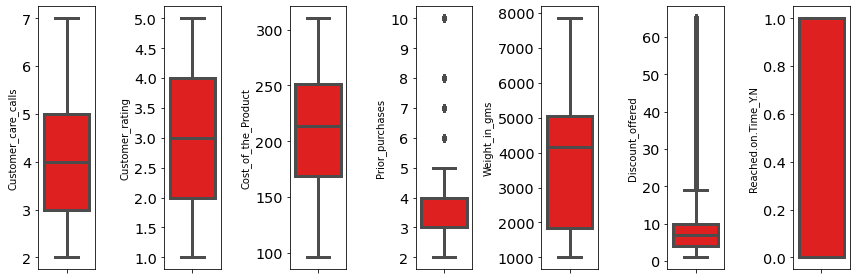

In [ ]:
# Box Plot
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df[nums[i]], color='red', orient='v')
    plt.tight_layout()

Untuk boxplot, hal paling penting yang harus kita perhatikan adalah keberadaan outlier.
* Outlier terlihat utamanya pada kolom `Prior_purchases`, dan `Discount_offered`terlihat sangat skewed.
* Dari boxplotnya terlihat mana distribusi yang terlihat agak *skewed*: `Customer_care_calls`, `Cost_of_the_Product` dan `Weight_in_gms`.

<ipython-input-22-09dbf36bf523>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2, len(nums)/2, i+1)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
<ipython-input-22-09dbf36bf523>:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(2, len(nums)/2, i+1)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your

ValueError: num must be 1 <= num <= 6, not 7

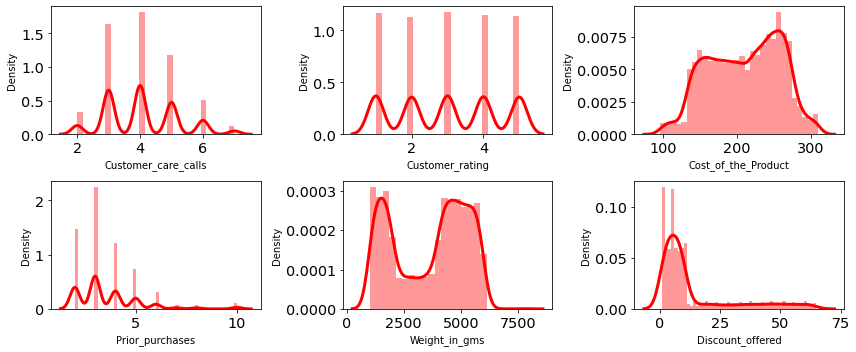

In [ ]:
# Dish Plot
plt.figure(figsize=(12, 5))
for i in range(0, len(nums)):
    plt.subplot(2, len(nums)/2, i+1)
    sns.distplot(df[nums[i]], color='red')
    plt.tight_layout()

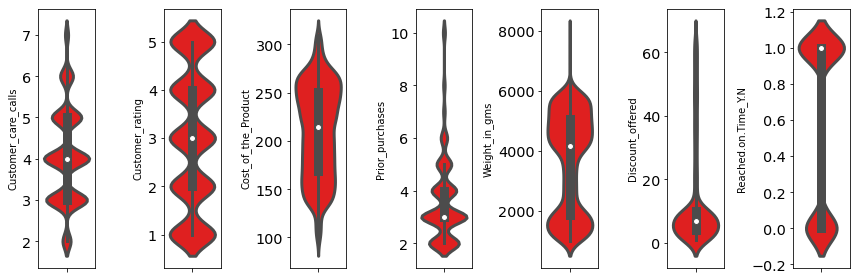

In [ ]:
# Violin Plot
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.violinplot(y=df[nums[i]], color='red', orient='v')
    plt.tight_layout()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

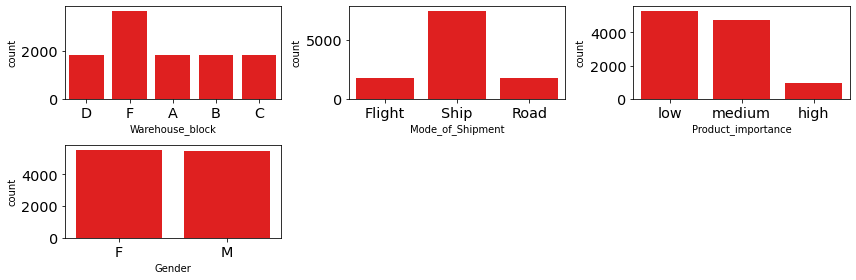

In [ ]:
# Count Plot (Categorical)
for i in range(0, len(cats)):
    plt.subplot(2, 3, i+1)
    sns.countplot(df[cats[i]], color='red', orient='v')
    plt.tight_layout()

Terakhir kita lihat count plot untuk setiap data. Seperti pengamatan kita sebelumnya, distribusi `Warehouse_block` , dan `Mode_of_Shipment` didominasi 1 value sedangkan `Product_importance` didominasi oleh 2 value.

## Bivariate Analysis
Setelah memilik setiap kolom secara individual, sekarang kita akan melihat hubungan antar kolom. Mengetahui hubungan antar kolom dapat membantu kita memilih fitur-fitur yang paling penting dan mengesampingkan *feature* yang redundan.

In [ ]:
#Correlation heatmap
df.corr()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.000000,0.188998,-0.005722,0.196791,0.145369,-0.598278,0.278312,-0.411822
Customer_care_calls,0.188998,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,-0.005722,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.196791,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.145369,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.598278,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,0.278312,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached.on.Time_Y.N,-0.411822,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


<AxesSubplot:>

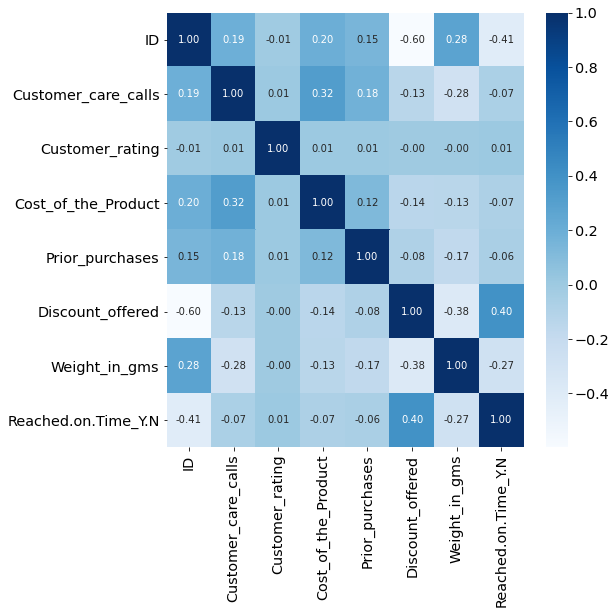

In [ ]:
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Dari *correlation heatmap* di atas dapat dilihat bahwa:

Korelasi paling tinggi dengan target adalah Discount_offered, akan tetapi nilainya juga tidak terlalu tinggi yaitu 0,40. Dapat dilihat bahwa tidak ada fitur yang berkorelasi tinggi dengan target, sehingga kemungkinan tidak dapat menggunakan model linear

Tidak ada fitur yang saling berkorelasi

## Pair Plot

<Figure size 1080x1080 with 0 Axes>

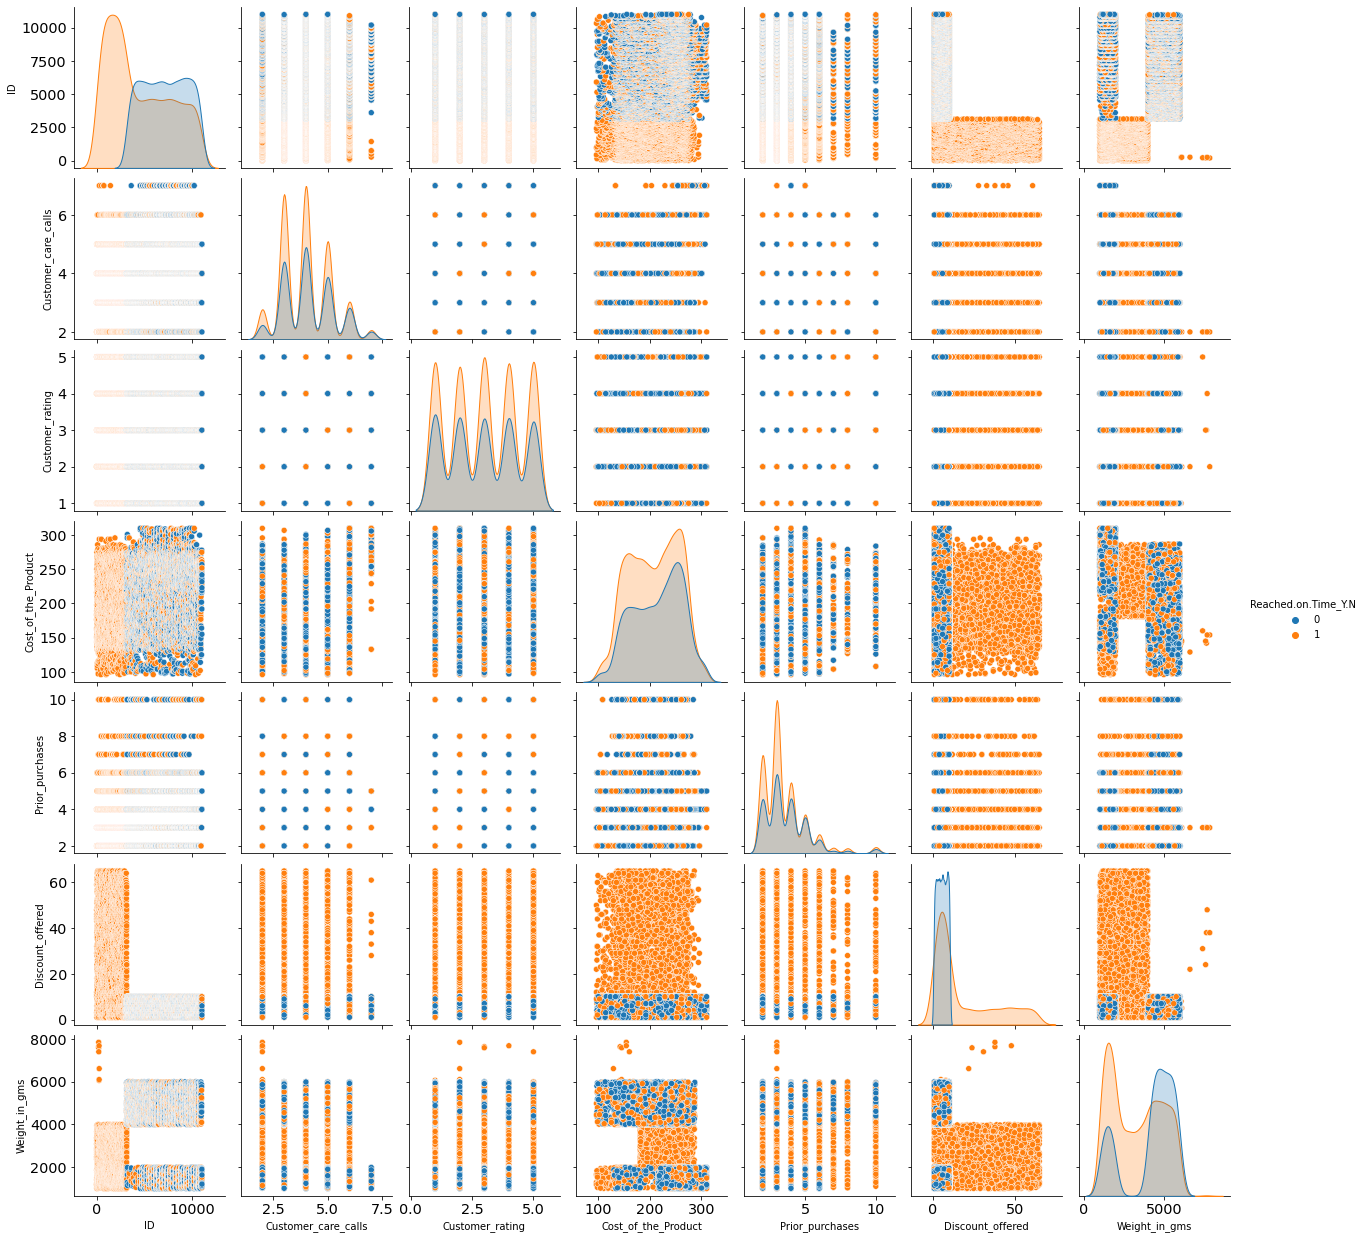

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde', hue='Reached.on.Time_Y.N')

Dari pair plot di atas, kita juga dapat melilhat hal yang mirip:
* Tidak ada fitur yang berkorelasi
* Adanya sebaran data yang cukup berbeda untuk fitur Discount_offered dan Wight_in_gms

## Category plots
Terakhir kita tampilkan *category plot* untuk setiap pasangan kategori *numeric* dan *categorical* seperti di bawah ini

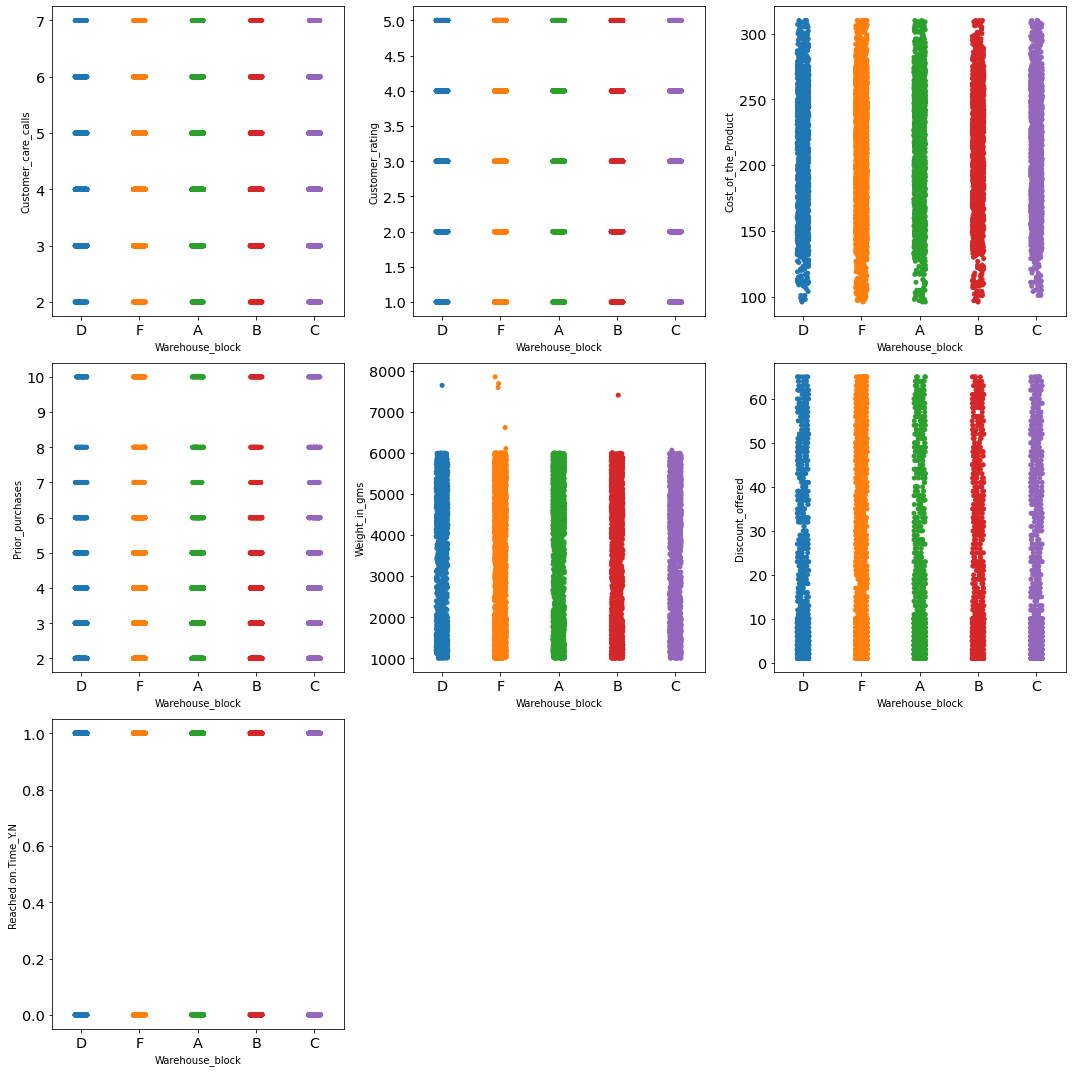

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): 
    ax = fig.add_subplot(3, 3, i+1) 
    sns.stripplot(ax=ax, data=df, x='Warehouse_block', y=nums[i])
    plt.tight_layout()

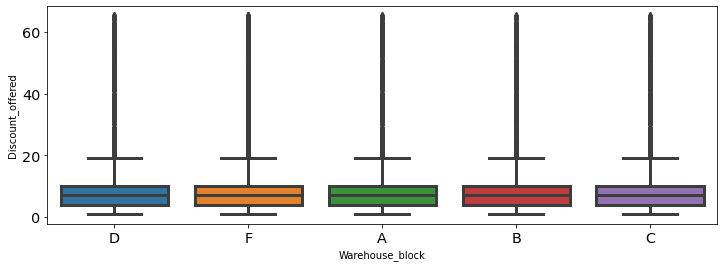

In [ ]:
ax = sns.boxplot(x="Warehouse_block", y="Discount_offered", data=df)
plt.show()

Warehouse_block terlihat tidak ada hubungan dengan fitur numerical

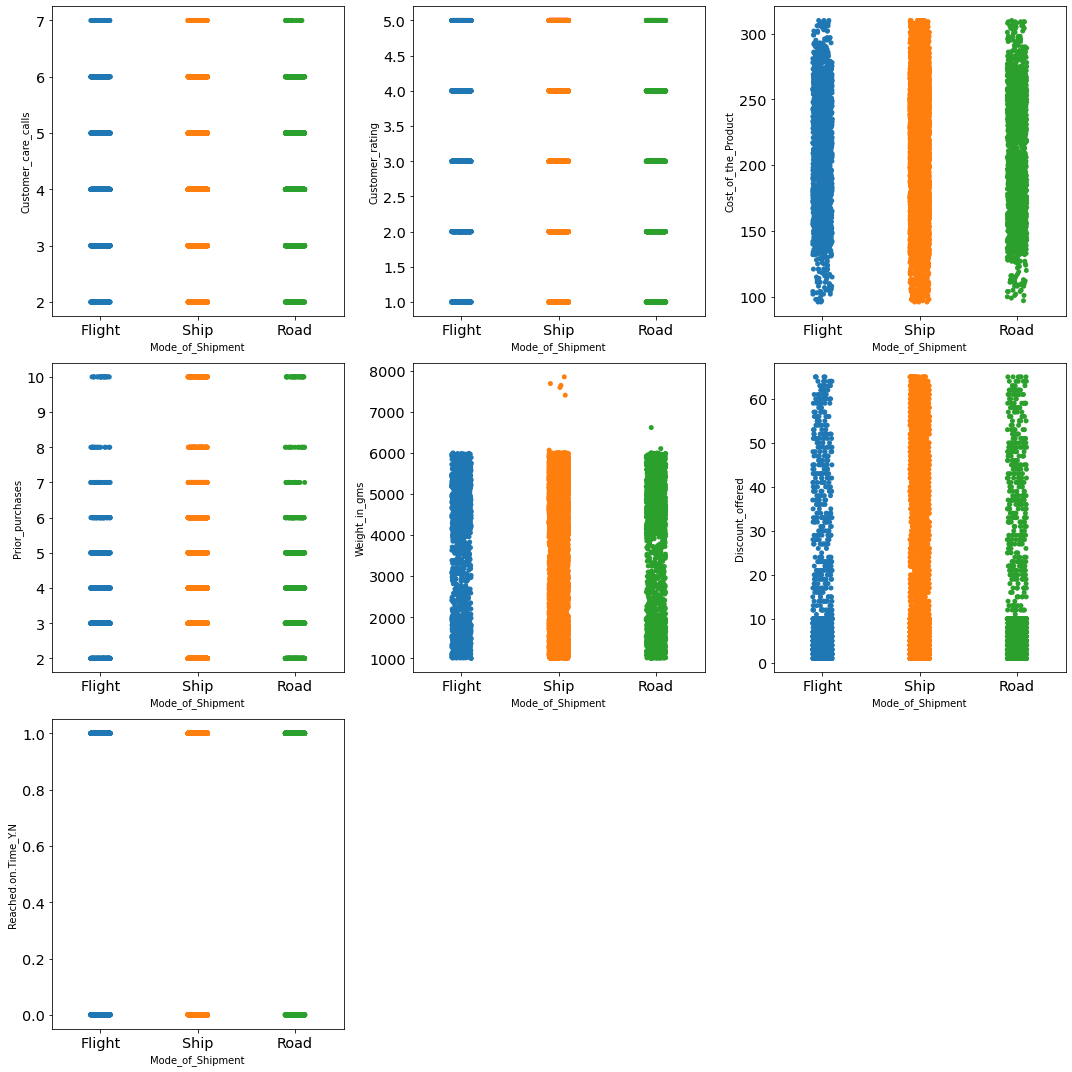

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): 
    ax = fig.add_subplot(3, 3, i+1) 
    sns.stripplot(ax=ax, data=df, x='Mode_of_Shipment', y=nums[i])
    plt.tight_layout()

Mode_of_Shipment terlihat tidak ada hubungan dengan fitur numerical

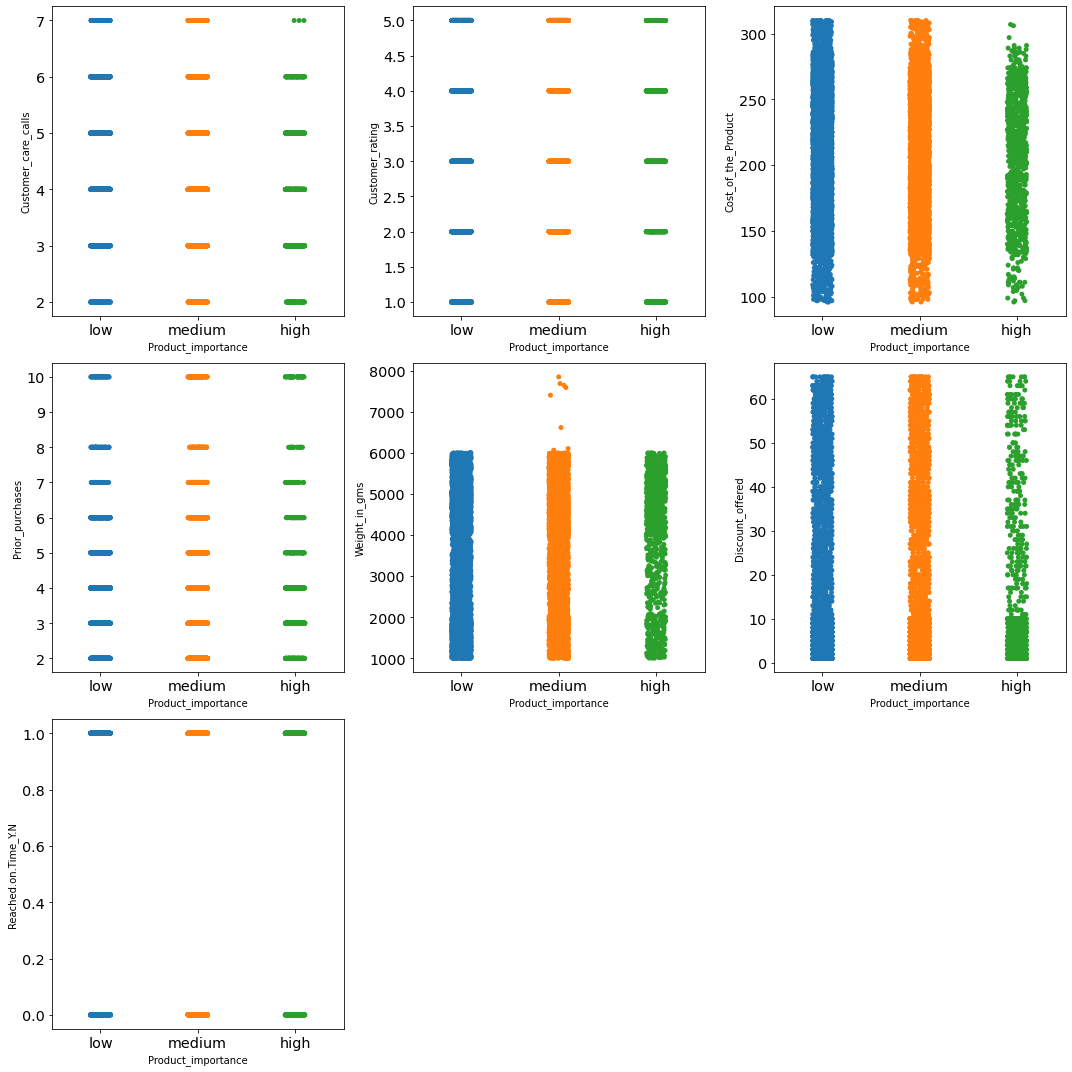

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): 
    ax = fig.add_subplot(3, 3, i+1) 
    sns.stripplot(ax=ax, data=df, x='Product_importance', y=nums[i])
    plt.tight_layout()

Product_importance terlihat tidak ada hubungan dengan fitur numerical

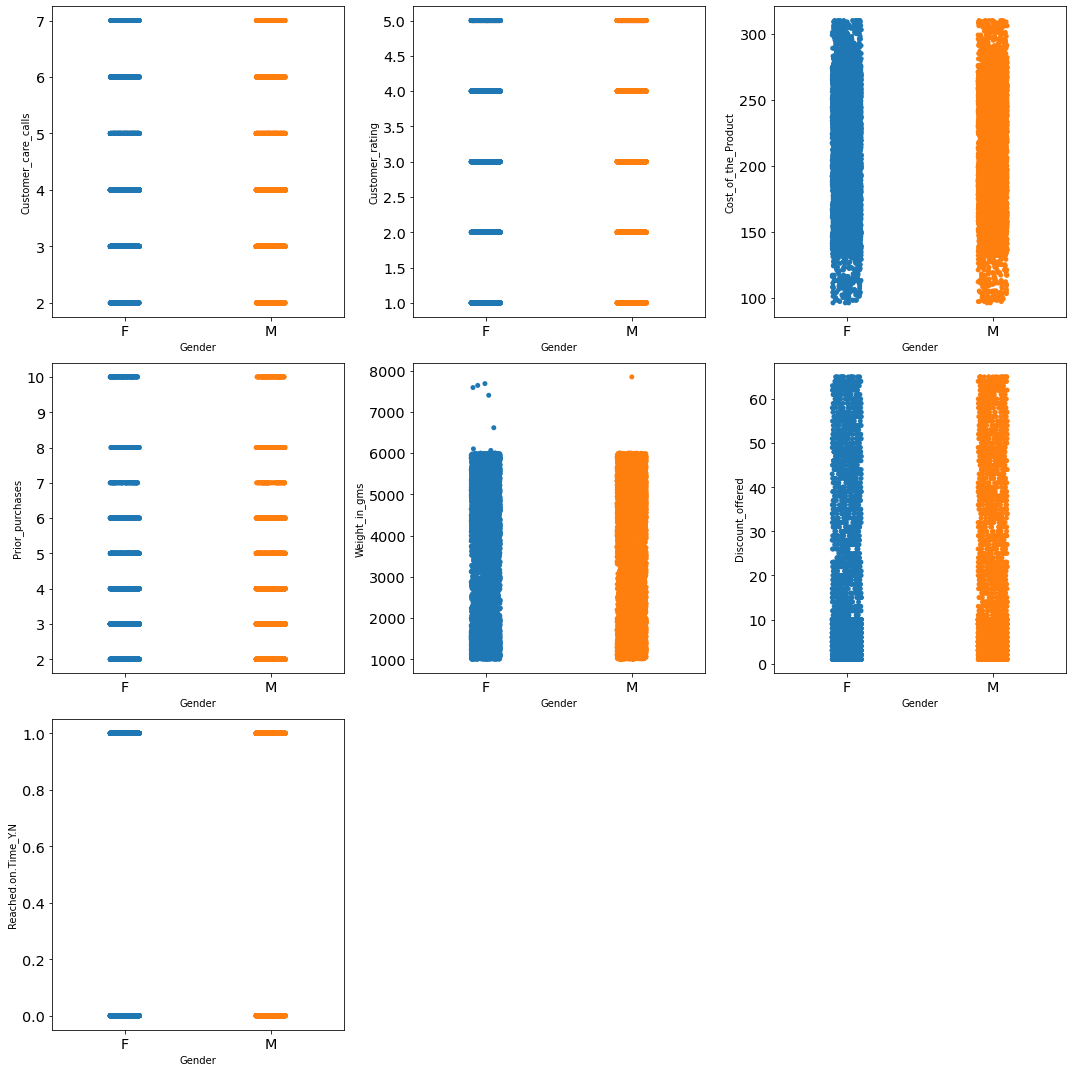

In [ ]:
fig = plt.figure(figsize=(15, 15))
for i in range(0, len(nums)): 
    ax = fig.add_subplot(3, 3, i+1) 
    sns.stripplot(ax=ax, data=df, x='Gender', y=nums[i])
    plt.tight_layout()

Gender terlihat tidak ada hubungan dengan fitur numerical

## EDA Conclusion
Beberapa hal yang kita temukan dari EDA dataset ini adalah:
* Data terlihat valid dan tidak ada kecacatan
* Tidak ada data-data yang kosong/hilang
* Ada beberapa distribusi yang sedikit *skewed*, hal ini harus diingat apabila kita ingin melakukan sesuatu atau menggunakan model yang memerlukan asumsi distribusi normal
* Tidak ada *feature* memiliki korelasi yang jelas dengan *target*
* Ada feature dengan data outliers: Discount_offered dan Prior_purchases

## Data Pre-Processing

In [ ]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

## Duplicated Data

In [ ]:
df.duplicated().sum()

0

## Outliers
### Menggunakan IQR

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['Discount_offered', 'Prior_purchases']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries
    
df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 10999
Jumlah baris setelah memfilter outlier: 7971


## 1.Discount_offered

<AxesSubplot:xlabel='Discount_offered', ylabel='Density'>

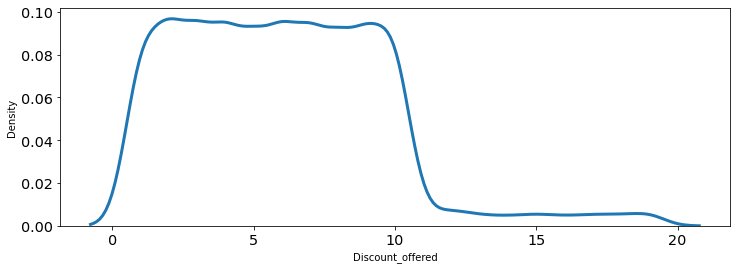

In [ ]:
sns.kdeplot(df['Discount_offered'])

<AxesSubplot:xlabel='Discount_offered', ylabel='Density'>

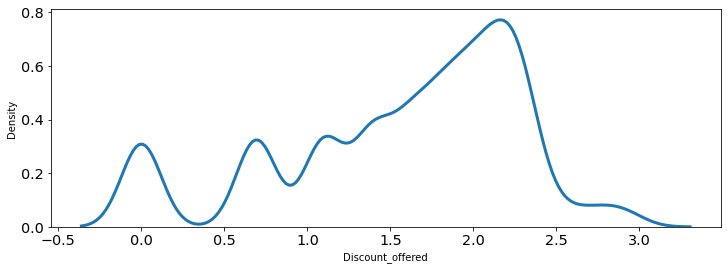

In [ ]:
sns.kdeplot(np.log(df['Discount_offered']))

# 2.Prior_purchases

<AxesSubplot:xlabel='Prior_purchases', ylabel='Density'>

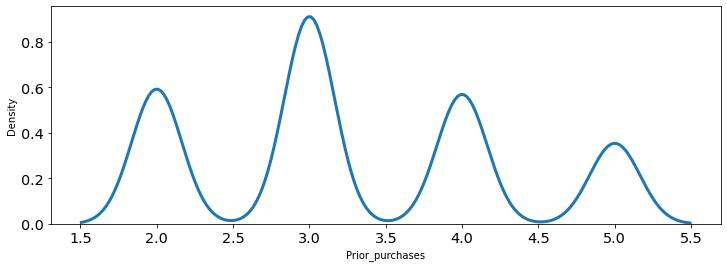

In [ ]:
sns.kdeplot(df['Prior_purchases'])

<AxesSubplot:xlabel='Prior_purchases', ylabel='Density'>

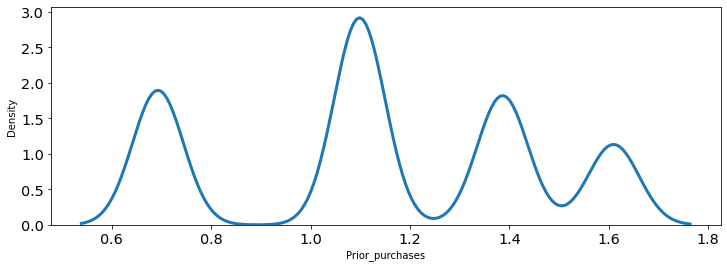

In [ ]:
sns.kdeplot(np.log(df['Prior_purchases']))

In [ ]:
df['Prior_purchases'] = np.log(df['Prior_purchases'])
df = df.drop(columns='Prior_purchases')

# 3.Weight_in_gms

<AxesSubplot:xlabel='Weight_in_gms', ylabel='Density'>

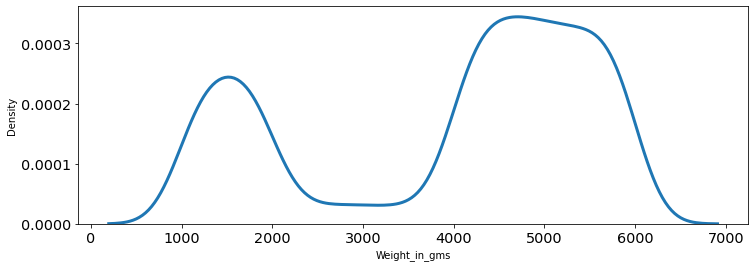

In [ ]:
sns.kdeplot(df['Weight_in_gms'])

<AxesSubplot:xlabel='Weight_in_gms', ylabel='Density'>

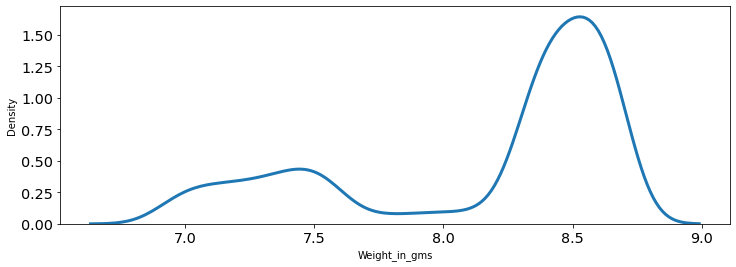

In [ ]:
sns.kdeplot(np.log(df['Weight_in_gms']))

In [ ]:
df['Weight_in_gms'] = np.log(df['Weight_in_gms'])
df = df.drop(columns='Weight_in_gms')